# WIN PREDICTION ANALYSIS


### INTRODUCTION 



      To predict the probability of win/loss for bidding activities for a potential client we have
      to build ML model.




#### Importing libraries for reading data and basic EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns



In [2]:
# reading data
df = pd.read_excel('Win_Prediction.xlsx')

In [3]:
# to check the data points in the data frame or the Nos. of rows and cloumns.
df.shape

(10061, 9)

In [4]:
# to check the data types present in data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [5]:
# to check the null values 
df.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [6]:
df.head(5)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [7]:
df['Client Category'].value_counts()

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [8]:
len(df['Client Category'].value_counts()), df['Client Category'].nunique()

(41, 41)

In [9]:
df.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code'],
      dtype='object')

In [10]:
df['VP Name'].nunique(), df['Manager Name'].nunique()

(43, 278)

In [11]:
df['VP Name'].value_counts()

Mervin Harwood         1166
Ankita Aggarwal        1143
Sargar Deep Rao         956
Long Bergstrom          921
Mangesh K. Singh        812
Rosanna Maynez          662
Ekta Zutshi             550
Rahul Bajpai            523
neeraj kumar            471
Son Mcconnaughy         232
som dutt                220
Hardeep Suksma          208
Brendon Wycoff          189
Clinton Mani            184
Saurabh Singh           176
Jewell Tunstall         156
Rudraksh Sharma         147
Gopa Trilochana         136
Russell Dahlen          133
Molly Eakes             126
Alam Syed               126
Gaurav Sameria          114
Gayle Molter            104
Varsha Arora            104
Vidur Hukle             100
Earline Langton          82
Manpreet Singh           46
Mayank Mewar             41
Rahul Kocher             32
Marcella Mo              32
Man Suddeth              29
Jitendra Choudhary       28
Prashant Rawat           27
Lilli Storrs             26
Vikram Rawat             17
Kamelesh Srinivasan 

In [12]:
df[df.isnull().any(axis=1)]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
488,NaN,Solution 7,2018-10-05,Sector 12,L10,Ankita Aggarwal,Kizzie Troxel,441176.47,Lost
491,NaN,Solution 7,2019-01-06,Sector 12,L10,Ankita Aggarwal,Kizzie Troxel,441176.47,Lost
518,NaN,Solution 10,2012-01-12,Sector 19,L10,Mangesh K. Singh,Hardeep Suksma,38235.29,Won
732,NaN,Solution 10,2013-11-08,Sector 23,L10,Rosanna Maynez,Sohil Kumar,58823.53,Won
1128,NaN,Solution 37,2013-09-27,Sector 24,L10,Mervin Harwood,Marcelo Riles,311764.71,Lost
...,...,...,...,...,...,...,...,...,...
9477,NaN,Solution 32,2018-09-26,Sector 23,L10,Long Bergstrom,Md Irshad,588235.29,Lost
9753,NaN,Solution 9,2018-08-04,Sector 19,L10,Gopa Trilochana,Darla Dickinson,485294.12,Won
9819,NaN,Solution 9,2018-09-15,Sector 19,L10,Clinton Mani,Sanchita Gulati,720588.24,Won
9904,NaN,Solution 14,2018-11-29,Sector 12,L10,Mangesh K. Singh,keshar ansari,529411.77,Won


In [13]:
df[df.isnull().any(axis = 1)].index

Int64Index([ 488,  491,  518,  732, 1128, 1208, 1256, 1266, 1587, 1593, 2034,
            2071, 2279, 2281, 2288, 2319, 2321, 2327, 2341, 2654, 2737, 2777,
            2805, 3083, 3117, 3175, 3214, 3268, 3507, 3774, 3868, 3891, 4079,
            4172, 4194, 4231, 4304, 4312, 4399, 4452, 4822, 4824, 4863, 4903,
            5997, 6010, 6054, 6151, 6457, 6464, 6829, 6835, 7139, 7353, 7354,
            7427, 7452, 7756, 7797, 7808, 7832, 7949, 7950, 8671, 8686, 8916,
            8936, 8968, 8986, 9227, 9242, 9298, 9312, 9333, 9477, 9753, 9819,
            9904, 9993],
           dtype='int64')

In [14]:
df['Deal Cost'].agg(['min', 'max'])

min           0.00
max    36764705.88
Name: Deal Cost, dtype: float64

In [15]:
df['Deal Cost'].max()

36764705.88

In [16]:
df['Deal Cost'].min()

0.0

In [17]:
df.rename({'Deal Cost':'Cost'}, axis = 1, inplace = True)

In [18]:
df.head(1)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.0,Won


In [19]:
df[df.Cost == 0]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Cost,Deal Status Code
79,Govt,Solution 37,2011-11-20,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
95,Others,Solution 31,2011-11-07,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
139,Govt,Solution 37,2012-02-06,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
150,Others,Solution 31,2012-03-23,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
210,Domestic Public Bank,Solution 59,2012-06-12,Sector 2,L10,Mervin Harwood,Lino Batterton,0.0,Lost
...,...,...,...,...,...,...,...,...,...
7886,Retail_market,Solution 9,2014-11-24,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,Lost
7903,Tech,Solution 9,2015-05-31,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,Lost
7907,Tech,Solution 9,2014-12-21,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,Lost
7921,Retail_market,Solution 9,2014-12-21,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,Lost


In [20]:
df.rename({'Deal Status Code':'Code'}, axis = 1, inplace = True)

In [21]:
df.head(1)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Cost,Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.0,Won


In [22]:
df[(df.Code == 'Won') & (df.Cost == 0)] 

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Cost,Code
713,Others,Solution 31,2013-01-23,Sector 6,L5,Sargar Deep Rao,Manpreet Singh,0.0,Won
943,Domestic Public Bank,Solution 37,2013-08-21,Sector 2,L10,Mervin Harwood,Somnath Mukherji,0.0,Won
981,Domestic Bank,Solution 59,2013-08-01,Sector 16,L1,Rosanna Maynez,Md. Daud,0.0,Won
10005,Domestic Private Bank,Solution 49,2018-11-29,Sector 2,L10,Mervin Harwood,Siddhant Gaur,0.0,Won


In [23]:
df[(df.Code == 'Won') & (df.Cost == 0)].index

Int64Index([713, 943, 981, 10005], dtype='int64')

In [24]:
df.agg(['min', 'max'])

,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Cost,Code
min,Solution 1,2011-04-19,Sector 1,L1,Alam Syed,Aastha Gandhi,0.00,Lost
max,Solution 9,2019-06-07,Sector 9,Others,som dutt,vinit katariya,36764705.88,Won


In [25]:
df['Cost'].agg(['min', 'max'])

min           0.00
max    36764705.88
Name: Cost, dtype: float64

In [26]:
df.isnull().sum()

Client Category    79
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Cost                0
Code                0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape

(9982, 9)

In [29]:
9982+79

10061

In [30]:
df.isnull().sum()

Client Category    0
Solution Type      0
Deal Date          0
Sector             0
Location           0
VP Name            0
Manager Name       0
Cost               0
Code               0
dtype: int64

In [31]:
df[(df.Code == 'Won') & (df.Cost == 0)]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Cost,Code
713,Others,Solution 31,2013-01-23,Sector 6,L5,Sargar Deep Rao,Manpreet Singh,0.0,Won
943,Domestic Public Bank,Solution 37,2013-08-21,Sector 2,L10,Mervin Harwood,Somnath Mukherji,0.0,Won
981,Domestic Bank,Solution 59,2013-08-01,Sector 16,L1,Rosanna Maynez,Md. Daud,0.0,Won
10005,Domestic Private Bank,Solution 49,2018-11-29,Sector 2,L10,Mervin Harwood,Siddhant Gaur,0.0,Won


In [32]:
df[(df.Code == 'Won') & (df.Cost == 0)].index

Int64Index([713, 943, 981, 10005], dtype='int64')

In [33]:
index = df[(df.Code == 'Won') & (df.Cost == 0)].index

In [34]:
df.drop(index, inplace = True)

In [35]:
df.shape

(9978, 9)

In [36]:

9978+79+4

10061

In [37]:
df.head(5)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Cost,Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [38]:
df_copy = df.copy(deep = True)

In [39]:
df.head(1)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Cost,Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.0,Won


In [40]:
df_copy.head(1)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Cost,Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.0,Won


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9978 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Client Category  9978 non-null   object        
 1   Solution Type    9978 non-null   object        
 2   Deal Date        9978 non-null   datetime64[ns]
 3   Sector           9978 non-null   object        
 4   Location         9978 non-null   object        
 5   VP Name          9978 non-null   object        
 6   Manager Name     9978 non-null   object        
 7   Cost             9978 non-null   float64       
 8   Code             9978 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 779.5+ KB


### Categorical Value Conversions( convert 'object' type to 'int' for model building )

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
df.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Cost', 'Code'],
      dtype='object')

In [44]:
df.drop(['Deal Date'], axis = 1, inplace = True)

In [45]:
df.shape

(9978, 8)

In [46]:
df.head(1)

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Cost,Code
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.0,Won


In [47]:
# initiate label encoder

client_ctegory = LabelEncoder()
sol_type = LabelEncoder()
Sector = LabelEncoder()
location = LabelEncoder()
VP_name = LabelEncoder()
manager_name = LabelEncoder()
code = LabelEncoder()

In [48]:
df.columns

Index(['Client Category', 'Solution Type', 'Sector', 'Location', 'VP Name',
       'Manager Name', 'Cost', 'Code'],
      dtype='object')

In [49]:
# fit and transform data

df['Client Category'] = client_ctegory.fit_transform(df['Client Category']) 
df['Solution Type'] = sol_type.fit_transform(df['Solution Type'])
df['Sector'] = Sector.fit_transform(df['Sector'])
df['Location'] = location.fit_transform(df['Location'])
df['VP Name'] = VP_name.fit_transform(df['VP Name'])
df['Manager Name'] = manager_name.fit_transform(df['Manager Name'])
df ['Code'] = code.fit_transform(df['Code'])

In [50]:
df.head(1)

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Cost,Code
0,39,64,16,7,6,81,150000.0,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9978 entries, 0 to 10060
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Client Category  9978 non-null   int32  
 1   Solution Type    9978 non-null   int32  
 2   Sector           9978 non-null   int32  
 3   Location         9978 non-null   int32  
 4   VP Name          9978 non-null   int32  
 5   Manager Name     9978 non-null   int32  
 6   Cost             9978 non-null   float64
 7   Code             9978 non-null   int32  
dtypes: float64(1), int32(7)
memory usage: 428.7 KB


In [52]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9978 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Client Category  9978 non-null   object        
 1   Solution Type    9978 non-null   object        
 2   Deal Date        9978 non-null   datetime64[ns]
 3   Sector           9978 non-null   object        
 4   Location         9978 non-null   object        
 5   VP Name          9978 non-null   object        
 6   Manager Name     9978 non-null   object        
 7   Cost             9978 non-null   float64       
 8   Code             9978 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 779.5+ KB


In [53]:
df.isnull().sum()

Client Category    0
Solution Type      0
Sector             0
Location           0
VP Name            0
Manager Name       0
Cost               0
Code               0
dtype: int64

### Feature Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
mms = MinMaxScaler()

In [56]:
scaled_df = mms.fit_transform(df)


In [57]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [58]:
scaled_df.head(5)

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Cost,Code
0,0.975,0.969697,0.666667,0.583333,0.142857,0.293478,0.004080,1.0
1,0.975,0.969697,0.666667,0.583333,0.142857,0.293478,0.020256,1.0
2,0.475,0.818182,0.500000,1.000000,0.142857,0.659420,0.001632,0.0
3,0.475,0.818182,0.500000,1.000000,0.142857,0.659420,0.001632,0.0
4,0.475,0.378788,0.500000,1.000000,0.142857,0.659420,0.002200,0.0


### Dividing dataset between dependent and indepent feature

In [59]:
x = scaled_df.drop(['Code'], axis = 1)

In [60]:
y = scaled_df[('Code')]

In [61]:
x.head(3)

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Cost
0,0.975,0.969697,0.666667,0.583333,0.142857,0.293478,0.004080
1,0.975,0.969697,0.666667,0.583333,0.142857,0.293478,0.020256
2,0.475,0.818182,0.500000,1.000000,0.142857,0.659420,0.001632


In [62]:
y.head(4)

0    1.0
1    1.0
2    0.0
3    0.0
Name: Code, dtype: float64

### Feature Importance

In [63]:
# feature importance

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.1130406  0.13865157 0.10195695 0.07530882 0.12407893 0.16252889
 0.28443424]


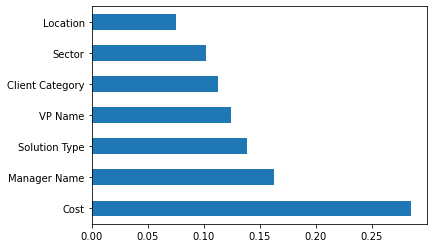

In [64]:
# graphical visual of important features
feature_visual = pd.Series(model.feature_importances_, index = x.columns)
feature_visual.nlargest(7).plot(kind = 'barh')

In [65]:
x.head(2)

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Cost
0,0.975,0.969697,0.666667,0.583333,0.142857,0.293478,0.004080
1,0.975,0.969697,0.666667,0.583333,0.142857,0.293478,0.020256


In [66]:
x.drop(['Location'], axis = 1, inplace = True)

In [67]:
x.head(2)

,Client Category,Solution Type,Sector,VP Name,Manager Name,Cost
0,0.975,0.969697,0.666667,0.142857,0.293478,0.004080
1,0.975,0.969697,0.666667,0.142857,0.293478,0.020256


### Train Test Split

In [68]:
# train_test_split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 6)

In [69]:
x_train.shape, y_train.shape

((7982, 6), (7982,))

In [70]:
x_test.shape, y_test.shape

((1996, 6), (1996,))

## Model building

In [71]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 101)
model_1 = log_model.fit(x_train,y_train)

prediction_1 = model_1.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_1 = accuracy_score(y_test, prediction_1)
print(accuracy_1)

print(confusion_matrix(y_test,prediction_1))

print(classification_report(y_test, prediction_1))

0.6327655310621243
[[1263    1]
 [ 732    0]]
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.78      1264
         1.0       0.00      0.00      0.00       732

    accuracy                           0.63      1996
   macro avg       0.32      0.50      0.39      1996
weighted avg       0.40      0.63      0.49      1996



In [72]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(random_state = 101)
random_forest = model_2.fit(x_train, y_train)

prediction_2 = random_forest.predict(x_test)

accuracy_2 = accuracy_score(y_test, prediction_2)
print(accuracy_2)

print(confusion_matrix(y_test,prediction_2))

print(classification_report(y_test,prediction_2))

0.814629258517034
[[1199   65]
 [ 305  427]]
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87      1264
         1.0       0.87      0.58      0.70       732

    accuracy                           0.81      1996
   macro avg       0.83      0.77      0.78      1996
weighted avg       0.82      0.81      0.80      1996



In [73]:
from sklearn.neighbors import KNeighborsClassifier
model_3 = KNeighborsClassifier(n_neighbors=5)
knn = model_3.fit(x_train,y_train)

prediction_3 = knn.predict(x_test)

accuracy_3 = accuracy_score(y_test,prediction_3)
print(accuracy_3)

print(confusion_matrix(y_test,prediction_3))

print(classification_report(y_test,prediction_3))

0.6773547094188377
[[989 275]
 [369 363]]
              precision    recall  f1-score   support

         0.0       0.73      0.78      0.75      1264
         1.0       0.57      0.50      0.53       732

    accuracy                           0.68      1996
   macro avg       0.65      0.64      0.64      1996
weighted avg       0.67      0.68      0.67      1996

